In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plot

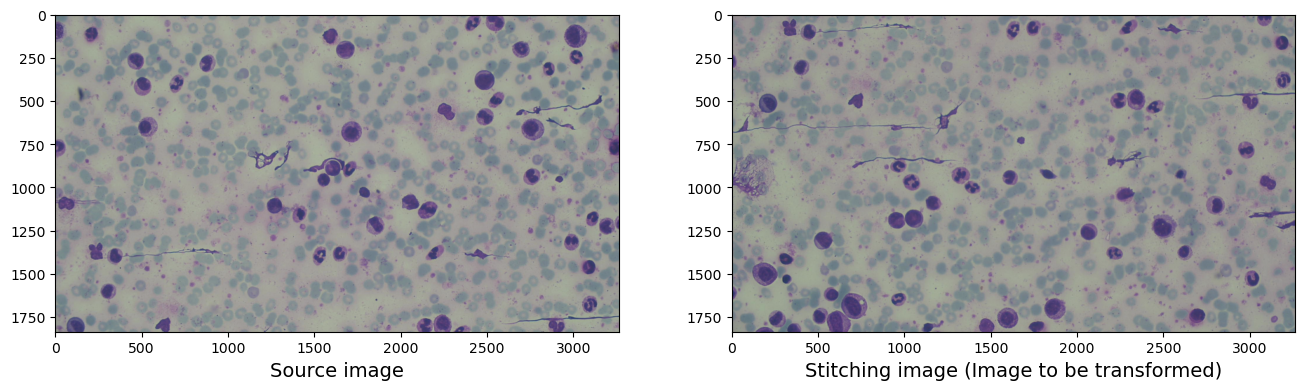

In [52]:
# importing images
img1 = cv2.imread('TS-027.png') # source image
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread('TS-030.png') # stitching image
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# Now view/plot the images
fig, (ax1, ax2) = plot.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(img1, cmap="gray")
ax1.set_xlabel("Source image", fontsize=14)

ax2.imshow(img2, cmap="gray")
ax2.set_xlabel("Stitching image (Image to be transformed)", fontsize=14)

# plt.savefig("./_"+'.jpeg', bbox_inches='tight', dpi=300, optimize=True, format='jpeg')

plot.show()

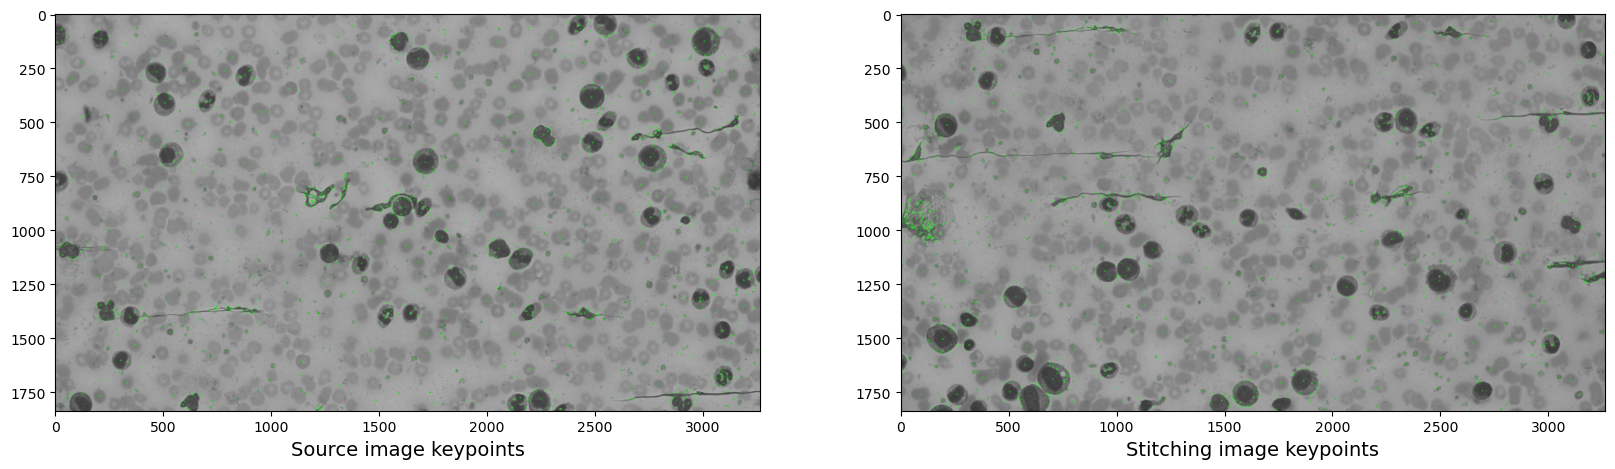

In [53]:
# getting SIFT keypoints and descriptors
descriptor = cv2.SIFT_create()

kp_img1, desc_img1 = descriptor.detectAndCompute(img1_gray, None)
kp_img2, desc_img2 = descriptor.detectAndCompute(img2_gray, None)

# display the keypoints and features detected on both images
fig, (ax1,ax2) = plot.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(img1_gray, kp_img1, None, color=(0,255,0)))
ax1.set_xlabel("Source image keypoints", fontsize=14)

ax2.imshow(cv2.drawKeypoints(img2_gray,kp_img2,None,color=(0,255,0)))
ax2.set_xlabel("Stitching image keypoints", fontsize=14)
plot.show()

In [54]:
# finding matches using brute force method
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(desc_img2, desc_img1, k=2) 
# print(matches)

In [55]:
# ratio test
ratio = 0.75

good = []
for m in matches:
    if m[0].distance < m[1].distance*ratio:
        good.append(m[0])
matches = good
# print(matches)


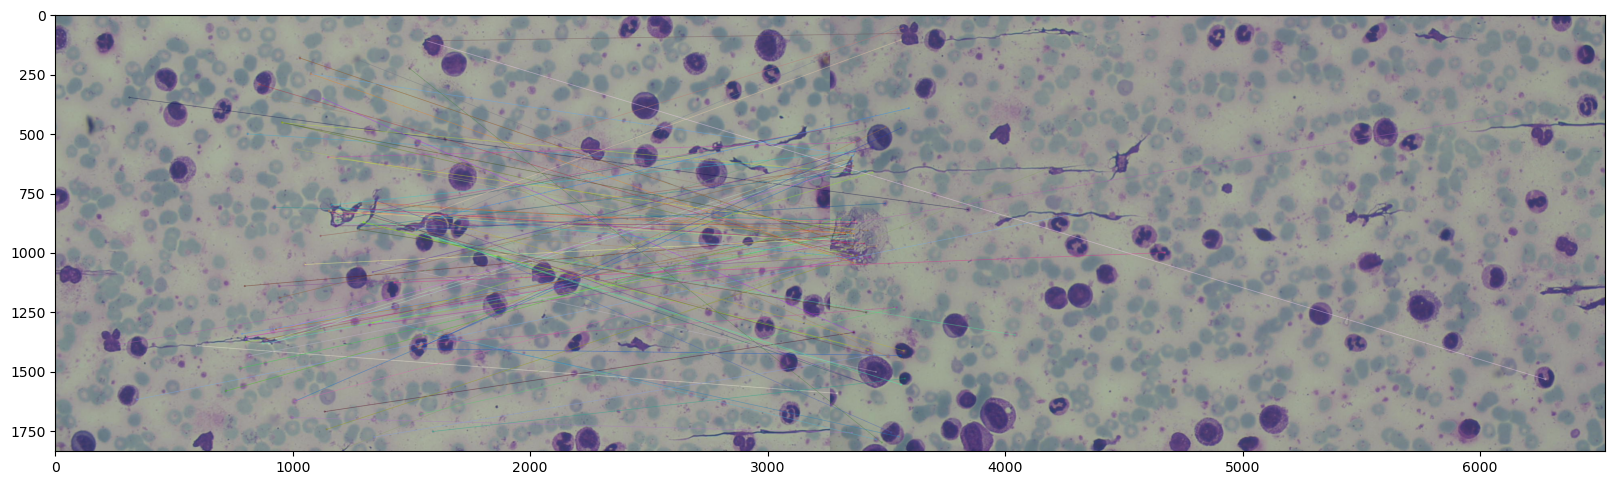

In [56]:
fig =  plot.figure(figsize=(20,8))
mapped_features_image = cv2.drawMatches(img1,kp_img1,img2,kp_img2,matches[:100],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plot.imshow(mapped_features_image)

In [57]:
# finding homography matrix
threshold = 5

kp_img1_pt = np.float32([kp.pt for kp in kp_img1])
kp_img2_pt = np.float32([kp.pt for kp in kp_img2])

if len(matches) >= 4:
    pts1 = np.float32([ kp_img1_pt[m.trainIdx] for m in matches ])
    pts2 = np.float32([ kp_img2_pt[m.queryIdx] for m in matches ])
    H, masked = cv2.findHomography(pts2, pts1, cv2.RANSAC, threshold)
    # print(H)
else:
    raise AssertionError("Not enough keypoints")

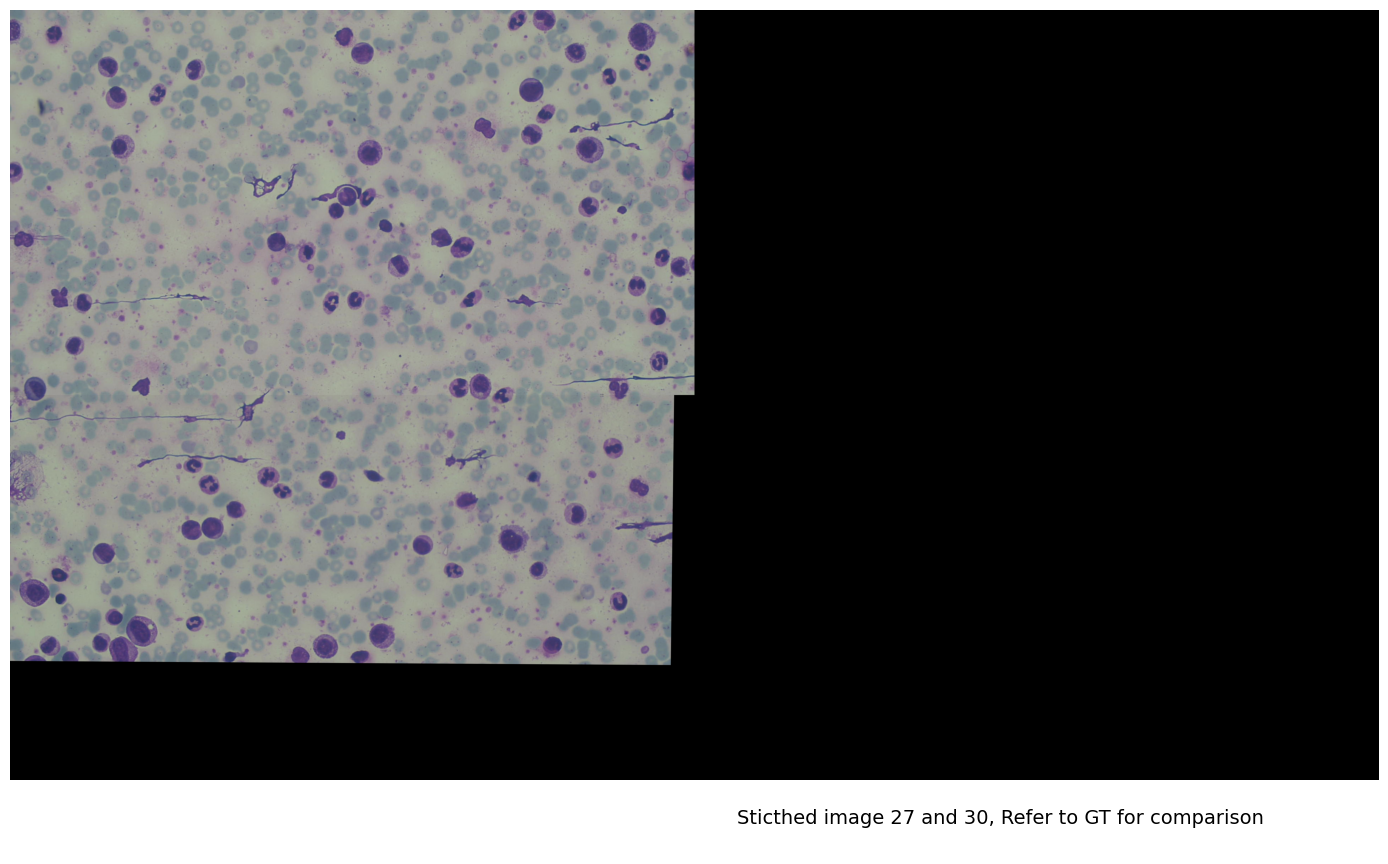

In [59]:
height = img1.shape[0] + img2.shape[0]
width = img1.shape[1] + img2.shape[1]

result = cv2.warpPerspective(img2, H, (width, height))
result[0:img1.shape[0], 0:img1.shape[1]] = img1

plot.figure(figsize=(20,10))
plot.axis('off')

cv2.imwrite('output.jpg', result)
plot.imshow(result)

plot.text(0.5, 0.05, 'Sticthed image 27 and 30, Refer to GT for comparison', ha='center', fontsize=14, transform=fig.transFigure)

plot.show()

## GROUND TRUTH FOR REFERENCE

![Image Description](gt.png)


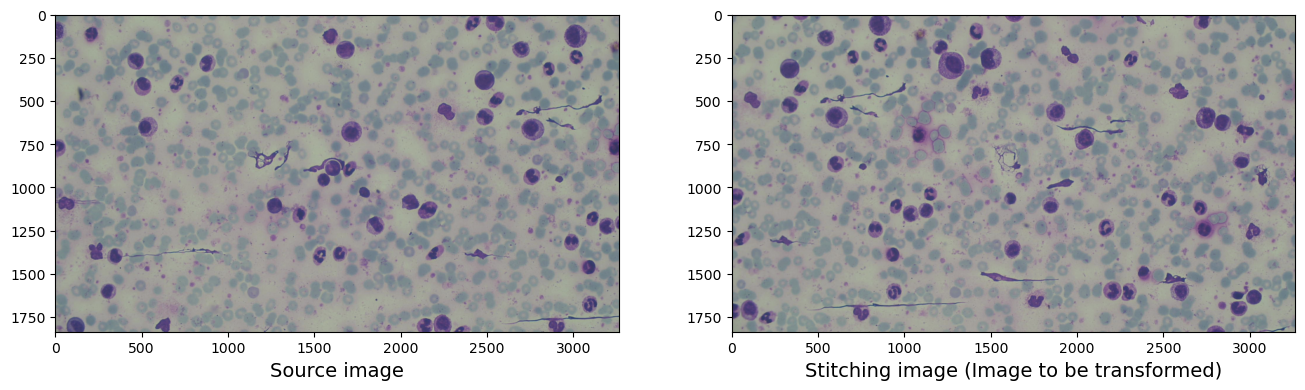

In [64]:
# importing images
img1 = cv2.imread('TS-027.png') # source image
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread('TS-028.png') # stitching image
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# Now view/plot the images
fig, (ax1, ax2) = plot.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(img1, cmap="gray")
ax1.set_xlabel("Source image", fontsize=14)

ax2.imshow(img2, cmap="gray")
ax2.set_xlabel("Stitching image (Image to be transformed)", fontsize=14)

# plt.savefig("./_"+'.jpeg', bbox_inches='tight', dpi=300, optimize=True, format='jpeg')

plot.show()

In [40]:
# getting SIFT keypoints and descriptors
descriptor = cv2.SIFT_create()

kp_img1, desc_img1 = descriptor.detectAndCompute(img1_gray, None)
kp_img2, desc_img2 = descriptor.detectAndCompute(img2_gray, None)

In [41]:
# finding matches using brute force method
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(desc_img2, desc_img1, k=2) 
# print(matches)

# ratio test
ratio = 0.75

good = []
for m in matches:
    if m[0].distance < m[1].distance*ratio:
        good.append(m[0])
matches = good
# print(matches)

# finding homography matrix
threshold = 5

kp_img1_pt = np.float32([kp.pt for kp in kp_img1])
kp_img2_pt = np.float32([kp.pt for kp in kp_img2])

if len(matches) >= 4:
    pts1 = np.float32([ kp_img1_pt[m.trainIdx] for m in matches ])
    pts2 = np.float32([ kp_img2_pt[m.queryIdx] for m in matches ])
    H, masked = cv2.findHomography(pts2, pts1, cv2.RANSAC, threshold)
    # print(H)
else:
    raise AssertionError("Not enough keypoints")

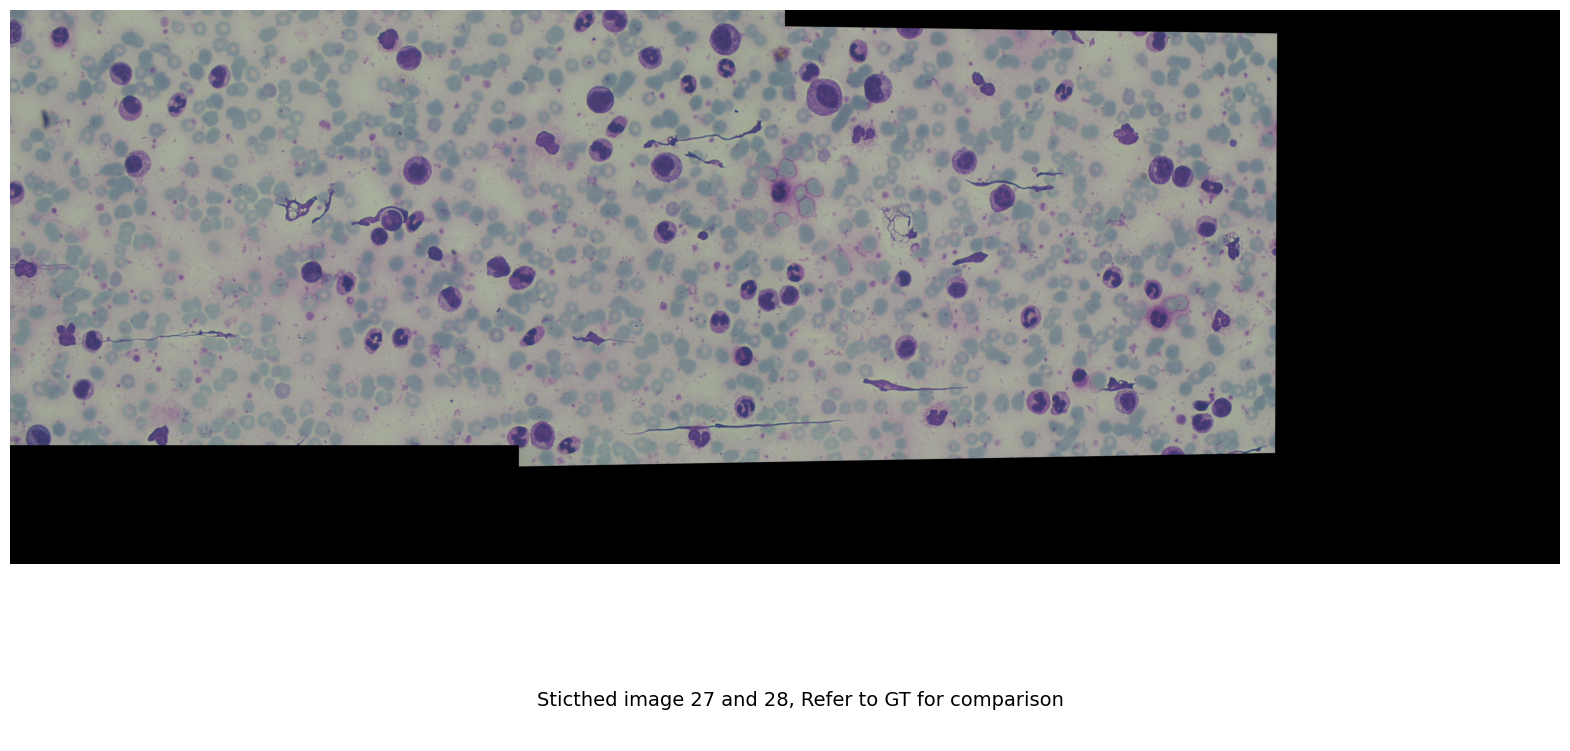

In [49]:
width = img1.shape[1] + img2.shape[1]
# print("width ", width) 
height = max(img1.shape[0] ,img2.shape[0] + 500 )

result = cv2.warpPerspective(img2, H, (width, height))
result[0:img1.shape[0], 0:img1.shape[1]] = img1

plot.figure(figsize=(20,10))
plot.axis('off')

cv2.imwrite('output.jpg', result)
plot.imshow(result)

plot.text(0.5, 0.05, 'Sticthed image 27 and 28, Refer to GT for comparison', ha='center', fontsize=14, transform=fig.transFigure)


plot.show()

## GROUND TRUTH FOR REFERENCE

![Image Description](gt.png)


In [65]:
# TODO: 
# calculate height, width dynamically based on warped image
# dynamically find a center point to anchor the source image
# visualize keypoints matching vertically if images are stitched together
# make proper functions 
# the stitched image can be used as source image to stitch the third incoming image 